In [500]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']  
%matplotlib inline


In [369]:
engine = create_engine('sqlite:///C:\\Users\hp1020\Desktop\mta_data.db')


In [370]:
insp = inspect(engine)
print(insp.get_table_names())


['mta_data']


In [516]:
mta_data = pd.read_sql('SELECT * FROM mta_data WHERE ENTRIES IS NOT NULL ORDER BY ENTRIES DESC;', engine) #Loading the dataframe
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,J003,R352,00-00-00,HEWES ST,JM,BMT,09/25/2021,01:00:00,REGULAR,2147375153,671176166
1,J003,R352,00-00-00,HEWES ST,JM,BMT,09/25/2021,05:00:00,REGULAR,2147375141,671176176
2,J003,R352,00-00-00,HEWES ST,JM,BMT,09/25/2021,09:00:00,REGULAR,2147375107,671176189
3,J003,R352,00-00-00,HEWES ST,JM,BMT,09/25/2021,13:00:00,REGULAR,2147375038,671176213
4,J003,R352,00-00-00,HEWES ST,JM,BMT,09/25/2021,17:00:00,REGULAR,2147374952,671176245
...,...,...,...,...,...,...,...,...,...,...,...
2732598,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,10/01/2021,05:00:00,REGULAR,0,496
2732599,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,10/01/2021,09:00:00,REGULAR,0,496
2732600,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,10/01/2021,13:00:00,REGULAR,0,496
2732601,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,10/01/2021,17:00:00,REGULAR,0,496


In [372]:
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [373]:
mta_data.columns = [column.strip().title() for column in mta_data.columns] #Reformatting the columns
mta_data.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits'],
      dtype='object')

In [417]:
mta_daily = (mta_data.groupby(["C/A", "Unit", "Scp", "Station", "Date"],as_index=False)
                        .Entries.first())
mta_daily.head(10)

,C/A,Unit,Scp,Station,Date,Entries
0,A002,R051,02-00-00,59 ST,09/25/2021,7641437
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823
5,A002,R051,02-00-00,59 ST,09/30/2021,7644508
6,A002,R051,02-00-00,59 ST,10/01/2021,7645237
7,A002,R051,02-00-00,59 ST,10/02/2021,7645650
8,A002,R051,02-00-00,59 ST,10/03/2021,7646010
9,A002,R051,02-00-00,59 ST,10/04/2021,7646634


In [418]:
(mta_data
 .groupby(["Station", "Date", "Time"])                       #Checking to verify columns are unique
 .Entries.count()
 .reset_index()
 .sort_values("Entries", ascending=False)).sample(10)

,Station,Date,Time,Entries
105061,BOWLING GREEN,12/21/2021,11:00:00,29
105632,BRIGHTON BEACH,09/25/2021,12:00:00,14
13426,14TH STREET,10/25/2021,17:06:51,1
215708,JOURNAL SQUARE,11/17/2021,05:58:19,1
166354,FRANKLIN ST,12/04/2021,20:00:00,8
117237,CHAMBERS ST,10/10/2021,04:00:00,55
374931,VAN SICLEN AV,11/18/2021,20:00:00,3
27124,181 ST,12/18/2021,00:00:00,8
359889,THIRTY THIRD ST,10/21/2021,03:50:53,1
148489,EASTN PKWY-MUSM,11/27/2021,19:00:00,9


In [419]:
mta_daily[["Previous_Date", "Previous_Entries"]] = (mta_daily
                                                       .groupby(["C/A", "Unit", "Scp", "Station"])[["Date", "Entries"]]
                                                       .shift(1))
mta_daily.head(10)                               #Creating new columns

,C/A,Unit,Scp,Station,Date,Entries,Previous_Date,Previous_Entries
0,A002,R051,02-00-00,59 ST,09/25/2021,7641437,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833,09/25/2021,7641437.0
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473,09/26/2021,7641833.0
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137,09/27/2021,7642473.0
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823,09/28/2021,7643137.0
5,A002,R051,02-00-00,59 ST,09/30/2021,7644508,09/29/2021,7643823.0
6,A002,R051,02-00-00,59 ST,10/01/2021,7645237,09/30/2021,7644508.0
7,A002,R051,02-00-00,59 ST,10/02/2021,7645650,10/01/2021,7645237.0
8,A002,R051,02-00-00,59 ST,10/03/2021,7646010,10/02/2021,7645650.0
9,A002,R051,02-00-00,59 ST,10/04/2021,7646634,10/03/2021,7646010.0


In [491]:
mta_daily.dropna(subset=["Previous_Date"], axis=0, inplace=True)
mta_daily.head()                                                         #Dropping NaN values

,C/A,Unit,Scp,Station,Date,Entries,Previous_Date,Previous_Entries,Daily_Entries
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833,09/25/2021,7641437.0,396.0
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473,09/26/2021,7641833.0,640.0
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137,09/27/2021,7642473.0,664.0
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823,09/28/2021,7643137.0,686.0
5,A002,R051,02-00-00,59 ST,09/30/2021,7644508,09/29/2021,7643823.0,685.0


In [421]:
(mta_daily["Entries"] - mta_daily["Previous_Entries"]).describe()

count    4.505880e+05
mean     7.503507e+03
std      7.282273e+06
min     -1.995575e+09
25%      9.600000e+01
50%      3.230000e+02
75%      6.400000e+02
max      1.995577e+09
dtype: float64

In [422]:
mta_daily[mta_daily["Entries"] < mta_daily["Previous_Entries"]].shape   #How many rows are backwards

(4621, 8)

In [423]:
mta_daily[mta_daily["Entries"] < mta_daily["Previous_Entries"]].head()   #How many rows are backwards

,C/A,Unit,Scp,Station,Date,Entries,Previous_Date,Previous_Entries
3550,A011,R080,01-03-00,57 ST-7 AV,09/26/2021,885570394,09/25/2021,885570678.0
3551,A011,R080,01-03-00,57 ST-7 AV,09/27/2021,885570198,09/26/2021,885570394.0
3552,A011,R080,01-03-00,57 ST-7 AV,09/28/2021,885569871,09/27/2021,885570198.0
3553,A011,R080,01-03-00,57 ST-7 AV,09/29/2021,885569494,09/28/2021,885569871.0
3554,A011,R080,01-03-00,57 ST-7 AV,09/30/2021,885569129,09/29/2021,885569494.0


In [424]:
(mta_daily[mta_daily["Entries"] < mta_daily["Previous_Entries"]]
    .groupby(["C/A", "Unit", "Scp", "Station"])
    .size())                                                          #How many counters are working in reverse

C/A   Unit  Scp       Station        
A011  R080  01-03-00  57 ST-7 AV         90
A013  R081  01-03-00  49 ST               1
A015  R081  00-00-02  49 ST               1
A046  R463  00-05-02  CANAL ST            1
A049  R088  02-05-00  CORTLANDT ST       66
                                         ..
R604  R108  03-00-03  BOROUGH HALL        1
R612  R057  01-05-00  ATL AV-BARCLAY      1
R622  R123  00-00-00  FRANKLIN AV        90
R730  R431  00-00-04  EASTCHSTER/DYRE    79
S101  R070  00-00-02  ST. GEORGE          1
Length: 203, dtype: int64

In [435]:
def get_daily_counts(row, max_counter):
  
    counter = row["Entries"] - row["Previous_Entries"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        print(f'entries: {row["Entries"]} <-- {row["Previous_Entries"]}')

        return 0
    
    return counter


mta_daily['Daily_Entries']= mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 338 <-- 5264647.0
entries: 186 <-- 5597948.0
entries: 233 <-- 1951349.0
entries: 326 <-- 1458405.0
entries: 1996226560 <-- 649779.0
entries: 651195 <-- 1996226560.0
entries: 83 <-- 453053850.0
entries: 1562968059 <-- 113672.0
entries: 531 <-- 9631915.0
entries: 307 <-- 3295646.0
entries: 327710 <-- 1560335855.0
entries: 117453575 <-- 459314.0
entries: 963 <-- 2548273.0
entries: 67136025 <-- 290390.0
entries: 1979658988 <-- 9048026.0
entries: 587209538 <-- 2350346.0
entries: 687930029 <-- 2704968.0
entries: 864279 <-- 1979303.0
entries: 369104686 <-- 1458906.0
entries: 1966428 <-- 196464.0
entries: 83942360 <-- 378941.0
entries: 264 <-- 6114636.0
entries: 898 <-- 7403757.0
entries: 591 <-- 9322443.0
entries: 100704922 <-- 418210.0
entries: 249 <-- 12553652.0
entries: 1626 <-- 557914846.0
entries: 46007131 <-- 7828674.0
entries: 566 <-- 67470015.0
entries: 2151581 <-- 1043925813.0
entries: 464 <-- 1132851.0
entries: 393622 <-- 3680678.0
entries: 2032018 <-- 4435939.0
entries: 16

In [437]:
mta_daily["Daily_Entries"].describe()

count    450588.000000
mean        517.594472
std        6064.164361
min           0.000000
25%         104.000000
50%         331.000000
75%         650.000000
max      990335.000000
Name: Daily_Entries, dtype: float64

In [438]:
station_daily = mta_daily.groupby(["Station", "Date"])[['Daily_Entries']].sum().reset_index()   #Sum of Daily entries for each station
station_daily.head(10)

,Station,Date,Daily_Entries
0,1 AV,09/26/2021,6795.0
1,1 AV,09/27/2021,9456.0
2,1 AV,09/28/2021,9726.0
3,1 AV,09/29/2021,10333.0
4,1 AV,09/30/2021,10624.0
5,1 AV,10/01/2021,10852.0
6,1 AV,10/02/2021,8158.0
7,1 AV,10/03/2021,6573.0
8,1 AV,10/04/2021,9655.0
9,1 AV,10/05/2021,9926.0


In [439]:
station_totals = station_daily.groupby('Station')['Daily_Entries'].sum().reset_index().sort_values('Daily_Entries', ascending=False)  #Sum of total ridership for each station for each week


station_totals.head(5)

,Station,Daily_Entries
61,34 ST-PENN STA,4986793.0
315,PATH NEW WTC,4808331.0
351,THIRTY ST,4530019.0
59,34 ST-HERALD SQ,3654884.0
233,GRD CNTRL-42 ST,3541360.0


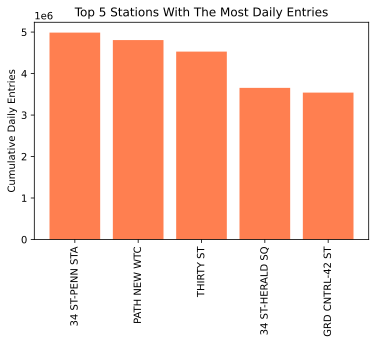

In [485]:
plt.bar(x=station_totals['Station'][:5], height=station_totals['Daily_Entries'][:5], color="coral")
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Entries")
plt.title("Top 5 Stations With The Most Daily Entries")
                                                             #Graphing the top 10 stations with the most entries

In [517]:
station_daily_34 = station_daily[(station_daily['Station'] == '34 ST-PENN STA')&(station_daily['Date'] > "09/30/2021")].copy()
station_daily_34.head(10)


,Station,Date,Daily_Entries
5495,34 ST-PENN STA,10/01/2021,55548.0
5496,34 ST-PENN STA,10/02/2021,38635.0
5497,34 ST-PENN STA,10/03/2021,33383.0
5498,34 ST-PENN STA,10/04/2021,56990.0
5499,34 ST-PENN STA,10/05/2021,60088.0
5500,34 ST-PENN STA,10/06/2021,60228.0
5501,34 ST-PENN STA,10/07/2021,61492.0
5502,34 ST-PENN STA,10/08/2021,57740.0
5503,34 ST-PENN STA,10/09/2021,40946.0
5504,34 ST-PENN STA,10/10/2021,33770.0


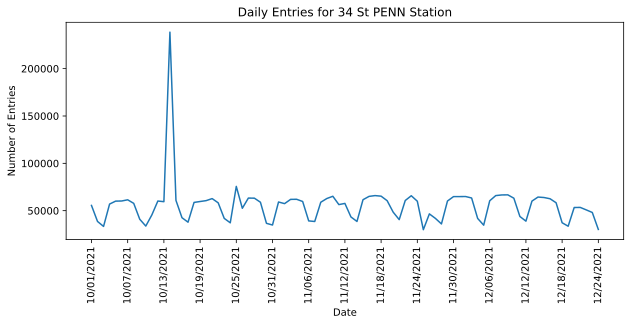

In [506]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_34['Date'], station_daily_34['Daily_Entries'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(station_daily_34["Date"])+1, 6), rotation=90)
plt.title('Daily Entries for 34 St PENN Station')
plt.savefig("Penn_Sta.svg")

In [449]:
station_daily_34[(station_daily_34["Station"] == "34 ST-PENN STA") &   
(station_daily_34["Date"] == "10/14/2021")]

,Station,Date,Daily_Entries
5508,34 ST-PENN STA,10/14/2021,238498.0


In [518]:
station_daily_PATH = station_daily[(station_daily['Station'] == 'PATH NEW WTC')&(station_daily['Date'] > "09/30/2021")].copy()
station_daily_PATH.head(10)

,Station,Date,Daily_Entries
28266,PATH NEW WTC,10/01/2021,22763.0
28267,PATH NEW WTC,10/02/2021,14116.0
28268,PATH NEW WTC,10/03/2021,11520.0
28269,PATH NEW WTC,10/04/2021,23209.0
28270,PATH NEW WTC,10/05/2021,26061.0
28271,PATH NEW WTC,10/06/2021,27455.0
28272,PATH NEW WTC,10/07/2021,26371.0
28273,PATH NEW WTC,10/08/2021,23744.0
28274,PATH NEW WTC,10/09/2021,14673.0
28275,PATH NEW WTC,10/10/2021,9366.0


Text(0.5, 1.0, 'Daily Entries for PATH Station')

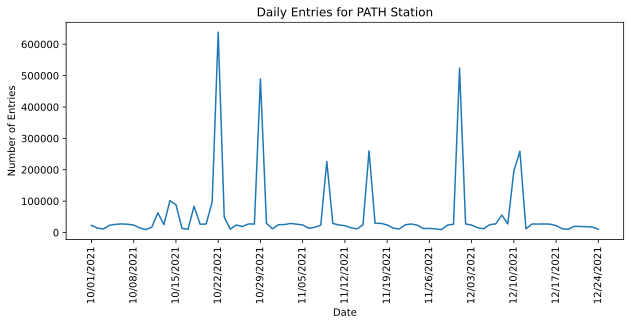

In [510]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_PATH['Date'], station_daily_PATH['Daily_Entries'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(station_daily_PATH["Date"])+1, 7), rotation=90)
plt.title('Daily Entries for PATH Station')


In [453]:
station_daily_PATH[(station_daily_PATH["Station"] == "PATH NEW WTC") &   
(station_daily_PATH["Date"] == "10/22/2021")]

,Station,Date,Daily_Entries
28287,PATH NEW WTC,10/22/2021,638408.0


In [454]:
station_daily_THIRTY = station_daily[(station_daily['Station'] == 'THIRTY ST')&(station_daily['Date'] > "09/30/2021")].copy()
station_daily_THIRTY.head()

,Station,Date,Daily_Entries
31506,THIRTY ST,10/01/2021,5147.0
31507,THIRTY ST,10/02/2021,4171.0
31508,THIRTY ST,10/03/2021,2553.0
31509,THIRTY ST,10/04/2021,4707.0
31510,THIRTY ST,10/05/2021,356188.0


Text(0.5, 1.0, 'Daily Entries for THIRTY ST Station')

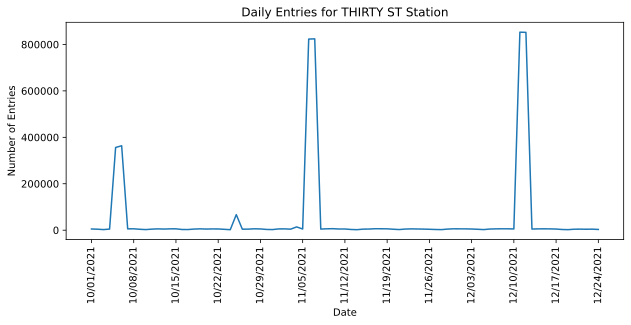

In [512]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_THIRTY['Date'], station_daily_THIRTY['Daily_Entries'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(station_daily_THIRTY["Date"])+1, 7), rotation=90)
plt.title('Daily Entries for THIRTY ST Station')

In [475]:
station_daily_THIRTY[(station_daily_THIRTY["Station"] == "THIRTY ST") &   
(station_daily_THIRTY["Date"] == "12/12/2021")]

,Station,Date,Daily_Entries
31578,THIRTY ST,12/12/2021,852019.0


In [477]:
station_daily_HERALD = station_daily[(station_daily['Station'] == '34 ST-HERALD SQ')&(station_daily['Date'] > "09/30/2021")].copy()
station_daily_HERALD.head()

,Station,Date,Daily_Entries
5315,34 ST-HERALD SQ,10/01/2021,42926.0
5316,34 ST-HERALD SQ,10/02/2021,32232.0
5317,34 ST-HERALD SQ,10/03/2021,26354.0
5318,34 ST-HERALD SQ,10/04/2021,39847.0
5319,34 ST-HERALD SQ,10/05/2021,42696.0


Text(0.5, 1.0, 'Daily Entries for 34 ST-HERALD SQ Station')

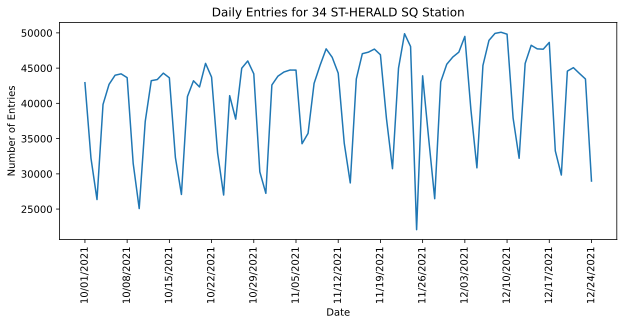

In [513]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_HERALD['Date'], station_daily_HERALD['Daily_Entries'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(station_daily_HERALD["Date"])+1, 7), rotation=90)
plt.title('Daily Entries for 34 ST-HERALD SQ Station')

In [479]:
station_daily_HERALD[(station_daily_HERALD["Station"] == "34 ST-HERALD SQ") &   
(station_daily_HERALD["Date"] == "12/09/2021")]

,Station,Date,Daily_Entries
5384,34 ST-HERALD SQ,12/09/2021,50086.0


In [467]:
station_daily_GRND_CNTRL = station_daily[(station_daily['Station'] == 'GRD CNTRL-42 ST')&(station_daily['Date'] > "09/30/2021")].copy()
station_daily_GRND_CNTRL.head() 

,Station,Date,Daily_Entries
20965,GRD CNTRL-42 ST,10/01/2021,41293.0
20966,GRD CNTRL-42 ST,10/02/2021,24070.0
20967,GRD CNTRL-42 ST,10/03/2021,18454.0
20968,GRD CNTRL-42 ST,10/04/2021,42185.0
20969,GRD CNTRL-42 ST,10/05/2021,45108.0


Text(0.5, 1.0, 'Daily Entries for Grand Central Station')

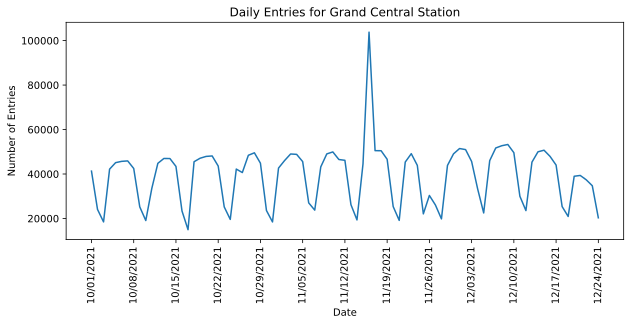

In [514]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_GRND_CNTRL['Date'], station_daily_GRND_CNTRL['Daily_Entries'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(station_daily_GRND_CNTRL["Date"])+1, 7), rotation=90)
plt.title('Daily Entries for Grand Central Station')

In [470]:
station_daily_GRND_CNTRL[(station_daily_GRND_CNTRL["Station"] == "GRD CNTRL-42 ST") &   
(station_daily_GRND_CNTRL["Date"] == "11/16/2021")]

,Station,Date,Daily_Entries
21011,GRD CNTRL-42 ST,11/16/2021,103792.0
